# Loading Libraries ↴

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder # to encode numerical labels

# Load in the Dataset ↴

In [30]:
data = pd.read_csv("milknew.csv") 
data.head() # present the first 5 rows of the dataset

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


# Label Encoder ↴

In [31]:
# Assigns numerical values to the 'Grade' columns' values
label_encoder = LabelEncoder()
data['Grade'] = label_encoder.fit_transform(data['Grade']) 
    # this is done as this column contains categorical data such as 'low', 'medium', etc.

# Features & Target ↴

In [32]:
# Define Features and Target
X = data.drop('Grade', axis=1)  # features > pH, Temp, etc.
y = data['Grade']  # target > Grade

# Splitting the data into training and testing ↴

In [33]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The KNN Model ↴

In [34]:
# Creating and Training the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# import pickle

# # Save the trained model
# with open('milk_quality_model.pkl', 'wb') as file:
#     pickle.dump(knn, file)

# # Save the label encoder
# with open('label_encoder.pkl', 'wb') as file:
#     pickle.dump(label_encoder, file)

# print("Model and encoder saved successfully!")

Model and encoder saved successfully!


# Making Predictions ↴

In [35]:
y_pred = knn.predict(X_test)

# Evaluating the Model ↴

In [36]:
# Calculating the accuracy
modelAccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {modelAccuracy: .2f}")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report\n",report)

Accuracy:  0.99
Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.97      0.99        78
           2       0.98      0.99      0.98        86

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



# Confusion Matrix Report (for Visualization) ↴

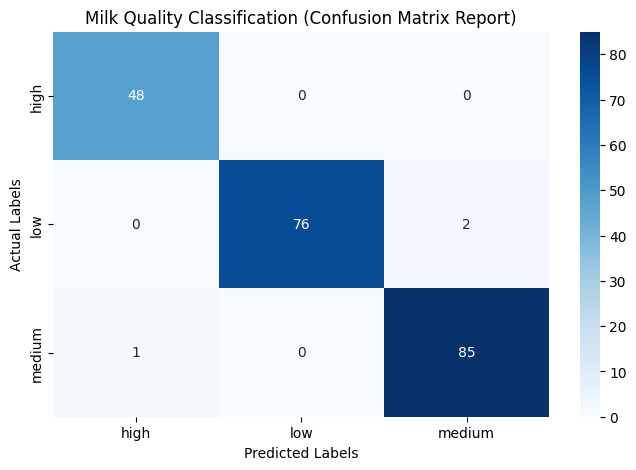

In [37]:
# Calculating the Report
c_matrix= confusion_matrix(y_test, y_pred)

# Plotting the Report
plt.figure(figsize=(8,5))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Milk Quality Classification (Confusion Matrix Report)')
plt.show()